In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Installing Pycaret and Importing needed libraries

In [8]:
!pip install pycaret

  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=b8f18dd7d62fcdb3df2694d7e7308187aad0292ab565274db4d3bf52788cfc09
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [2]:
import pandas as pd


## Importing dataset

In [3]:
dataset = pd.read_csv('/content/WineQT.csv')

## Data Description

In [4]:
dataset.shape

(1143, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
dataset.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## **Pycaret Setup**

In [9]:
from pycaret.classification import *
pycaret_setup = setup(data = dataset, target = 'quality', session_id=123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1143, 13)"
5,Transformed data shape,"(1143, 13)"
6,Transformed train set shape,"(800, 13)"
7,Transformed test set shape,"(343, 13)"
8,Numeric features,12
9,Preprocess,True


## Compare Models

In [10]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6750,0.3327,0.6750,0.6508,0.6554,0.4695,0.4750,0.5090
lightgbm,Light Gradient Boosting Machine,0.6512,0.3265,0.6512,0.6290,0.6339,0.4370,0.4425,1.5920
et,Extra Trees Classifier,0.6487,0.3353,0.6487,0.6268,0.6291,0.4258,0.4316,0.6280
xgboost,Extreme Gradient Boosting,0.6487,0.3236,0.6487,0.6274,0.6345,0.4348,0.4381,0.5930
gbc,Gradient Boosting Classifier,0.6388,0.3130,0.6388,0.6218,0.6253,0.4206,0.4246,2.0730
lda,Linear Discriminant Analysis,0.5912,0.3082,0.5912,0.5730,0.5770,0.3454,0.3485,0.0780
lr,Logistic Regression,0.5775,0.2901,0.5775,0.4967,0.5298,0.2856,0.2955,1.0170
dt,Decision Tree Classifier,0.5775,0.2758,0.5775,0.5902,0.5779,0.3481,0.3522,0.0690
ridge,Ridge Classifier,0.5738,0.0000,0.5738,0.4833,0.5221,0.2766,0.2867,0.0550
ada,Ada Boost Classifier,0.5588,0.2256,0.5588,0.5311,0.5279,0.2788,0.2859,0.4860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [11]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

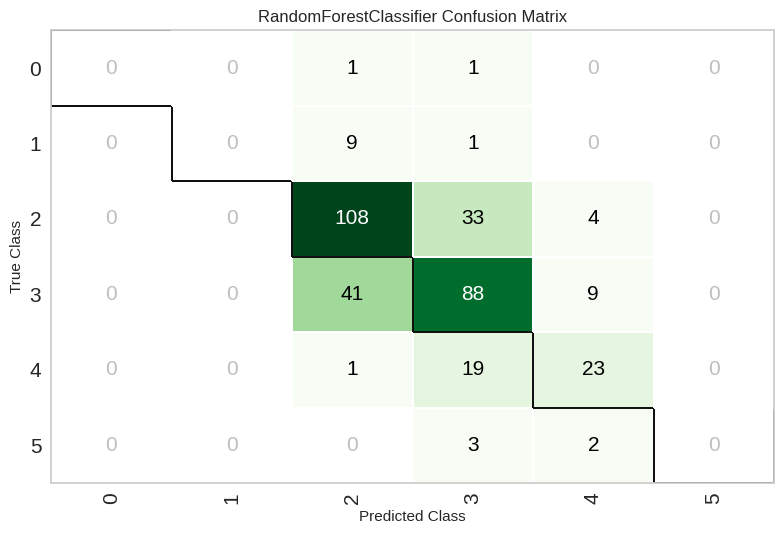

In [12]:
plot_model(best, plot = 'confusion_matrix')

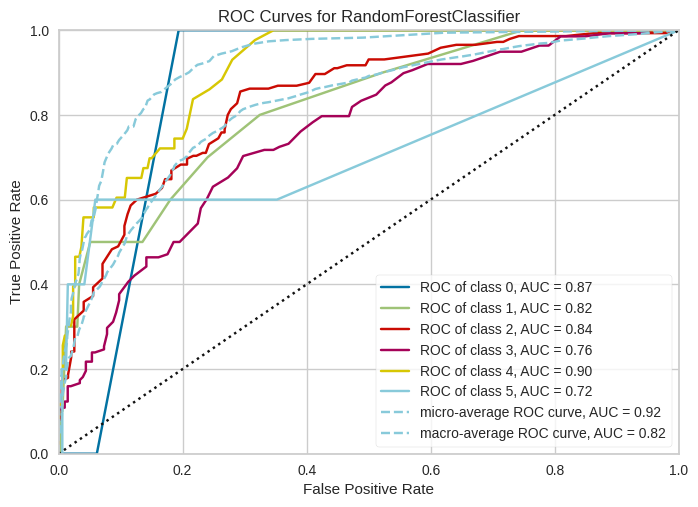

In [13]:
plot_model(best, plot = 'auc')

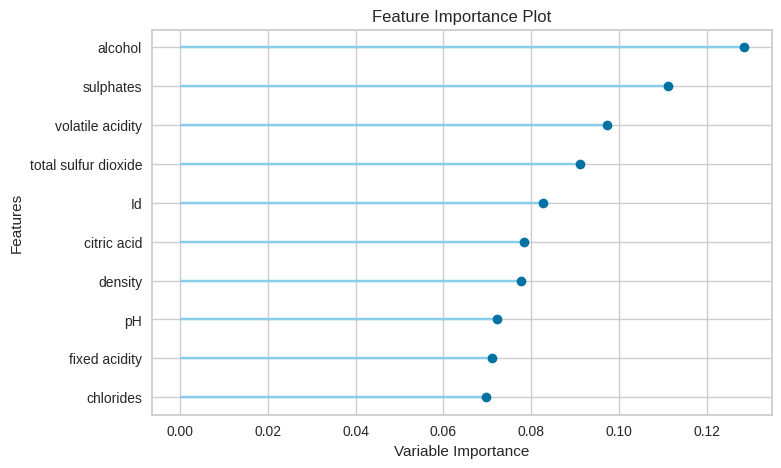

In [14]:
plot_model(best, plot = 'feature')

In [15]:
mymodel = create_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.0000,0.6875,0.6775,0.6783,0.4930,0.4975
1,0.6500,0.0000,0.6500,0.6286,0.6382,0.4305,0.4319
2,0.6875,0.0000,0.6875,0.6536,0.6682,0.4965,0.4998
3,0.7250,0.0000,0.7250,0.6890,0.7057,0.5565,0.5589
4,0.6625,0.0000,0.6625,0.6311,0.6333,0.4462,0.4610
5,0.6250,0.0000,0.6250,0.5935,0.6023,0.3830,0.3877
6,0.6250,0.7660,0.6250,0.6107,0.6061,0.3841,0.3897
7,0.7000,0.8517,0.7000,0.6758,0.6831,0.5142,0.5200
8,0.6875,0.8865,0.6875,0.6547,0.6688,0.4929,0.4953


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
mymodel = tune_model(mymodel)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.0000,0.5500,0.5313,0.5396,0.2798,0.2806
1,0.5250,0.0000,0.5250,0.5211,0.5192,0.2580,0.2596
2,0.4875,0.0000,0.4875,0.4429,0.4625,0.1577,0.1592
3,0.6250,0.0000,0.6250,0.6041,0.6092,0.3930,0.3988
4,0.6000,0.0000,0.6000,0.5585,0.5692,0.3439,0.3535
5,0.5500,0.0000,0.5500,0.5115,0.5246,0.2562,0.2594
6,0.4750,0.6418,0.4750,0.4500,0.4600,0.1429,0.1438
7,0.5375,0.6991,0.5375,0.5287,0.5248,0.2611,0.2673
8,0.6125,0.7685,0.6125,0.5664,0.5818,0.3600,0.3656


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
mymodel = finalize_model(mymodel)

In [30]:
save_model(mymodel,'multiClassificat')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH'...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                

In [20]:
load_model('multiClassificat')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)